In [45]:
import torch
import torchvision
import math

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.__version__

'1.3.1'

In [5]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [6]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

In [7]:
label = mnist_train.train_labels
train_data = mnist_train.train_data

/home/user/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/user/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


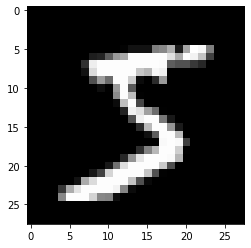

In [9]:
plt.imshow(train_data[0], cmap='gray')

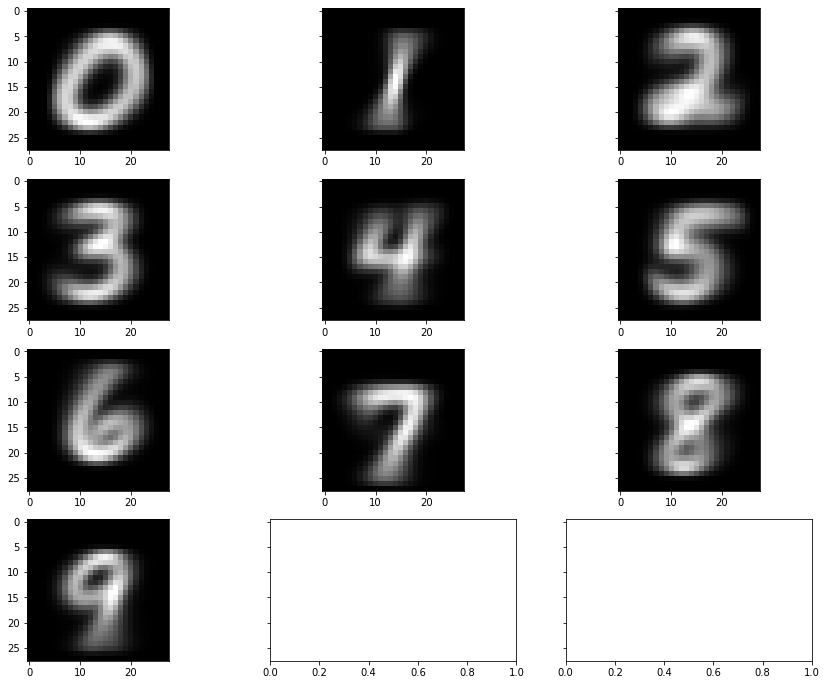

In [67]:
fig, axs = plt.subplots(4, 3, figsize=(15, 12), sharey=True)
for i in range(10):
    axs[i//3,i%3].imshow(train_data[label==i].sum(dim=0).float()/label[label==i].shape[0], cmap='gray')

In [34]:
import math

class MyByesClfMNIST:
    def __init__(self):
        self.dict_label = {}
        self.all_count = 0
        pass
    
    def fitMNIST(self, X, y):
        bin_X = (X/128).float()
        for i in y.unique():
            self.dict_label[i] = {
                'count'  :y[y==i].shape[0], 
                'items'  :bin_X[y==i], 
                'p_true' :bin_X[y==i].sum(dim=0).float()/y[y==i].shape[0] ,
                'p_0':y[y==i].shape[0]/X.shape[0],
                }
        pass
    
    def predictMNIST(self, X,y=None):
        bin_X = (X/128).float()
        label_dict = {}
        res = torch.zeros( bin_X.shape[0], (len(self.dict_label.keys())), dtype=torch.float64)
        for j in  range(bin_X.shape[0]):
            xx = bin_X[j]
            for i,k in enumerate(self.dict_label.keys()):
                label_dict[i] = k
                res[j,i] = math.log(self.dict_label[k]['p_0']) + \
                         torch.masked_select(torch.log(xx * self.dict_label[k]['p_true'] + 0.00001),xx.type(dtype=torch.bool) ).sum() + \
                         torch.masked_select(torch.log((1-xx) * (1-self.dict_label[k]['p_true']) + 0.00001),(1-xx).type(dtype=torch.bool)).sum() 

            res_i = res.argmax(dim=1).apply_(lambda x:label_dict[x] ) 
        return res_i
    

In [46]:
train_data_1_2 = train_data[(0 < label) & (label< 3)]
label_1_2 = label[(0 < label) & (label< 3)]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(train_data_1_2.numpy(), label_1_2.numpy(), test_size=0.33, random_state=42)

In [36]:
cls = MyByesClfMNIST()

In [49]:
cls.fitMNIST(torch.from_numpy(X_train), torch.from_numpy(y_train))

In [50]:
res = cls.predictMNIST(torch.from_numpy(X_test))

In [51]:
accuracy_score(torch.from_numpy(y_test), res)

0.9735146743020758

In [81]:
X_test[torch.from_numpy(y_test) != res].shape

(111, 28, 28)

In [96]:
X_error = torch.from_numpy(X_test[torch.from_numpy(y_test) != res])
y_error = y_test[torch.from_numpy(y_test) != res]
res_error = res[torch.from_numpy(y_test) != res].numpy() 

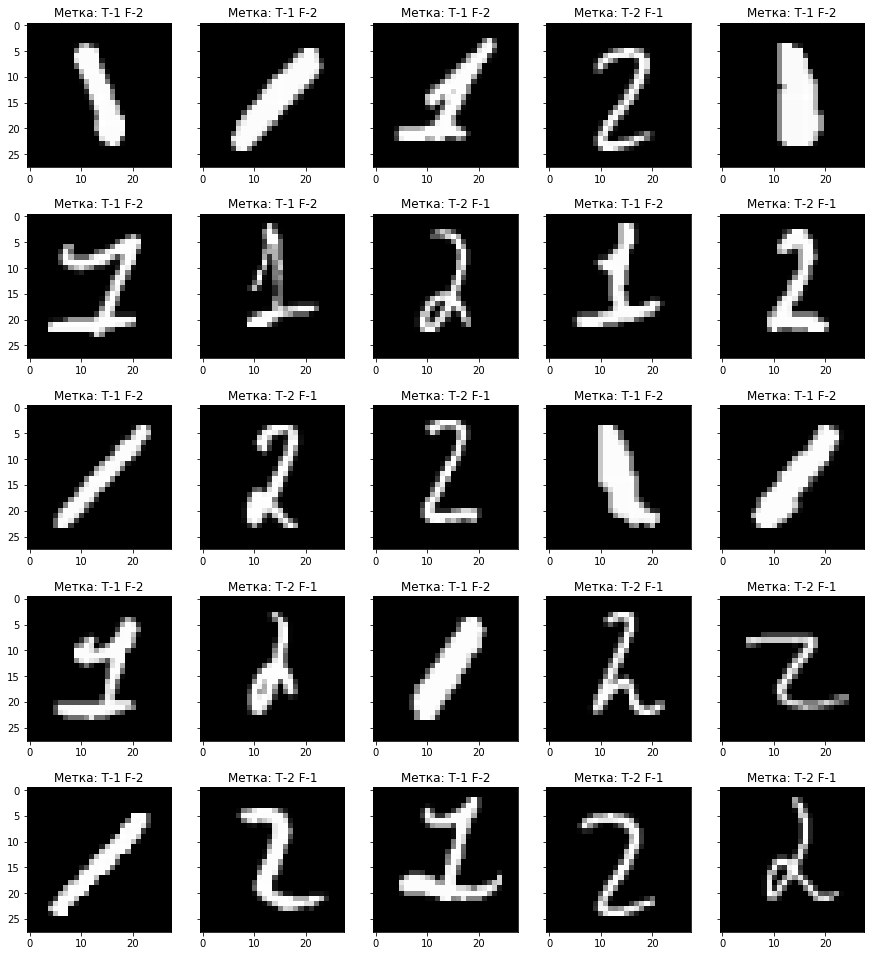

In [110]:
fig, axs = plt.subplots(5, 5, figsize=(15, 17), sharey=True)
for i in range(25):
    axs[i//5,i%5].imshow(X_error[i*3], cmap='gray')
    axs[i//5,i%5].set_title('Метка: T-'+str(y_error[i*3])+' F-'+str(res_error[i*3]))

In [68]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_data.numpy(), label.numpy(), test_size=0.33, random_state=42)

In [69]:
cls2 = MyByesClfMNIST()

In [71]:
cls2.fitMNIST(torch.from_numpy(X_train2), torch.from_numpy(y_train2))

In [72]:
res2 = cls2.predictMNIST(torch.from_numpy(X_test2))

In [75]:
accuracy_score(torch.from_numpy(y_test2), res2)

0.833989898989899